In [1]:

pip install ortools python_tsp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.2 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: networkx
    Found existing installation: networkx 3.5
    Uninstalling networkx-3.5:
      Successfully uninstalled networkx-3.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not current

🌟 Advanced TSP Solver

1️⃣ Testing with Berlin52 benchmark:
🚀 Starting comprehensive TSP solving...
  🔍 Running Nearest Neighbor Multi-start...
     ✓ Distance: 8864
  🎯 Running Christofides Algorithm...
     ✓ Distance: 8660
  🧬 Running Genetic Algorithm...
     ✓ Distance: 14967
  🌡️  Running Simulated Annealing...
     ✓ Distance: 8660
  🎪 Running K-means Clustering...
     ✓ Distance: 8757
  🔧 Applying local search improvements...
     ✓ Nearest Neighbor improved to: 8019
     ✓ Christofides improved to: 7946
     ✓ Genetic Algorithm improved to: 8391
     ✓ Simulated Annealing improved to: 7946
     ✓ K-means Clustering improved to: 8251

🏆 Best solution: Christofides + Local Search
   Distance: 7946
   Total time: 10.76s

Best solution found: 7946
Known optimal for Berlin52: 7542
Gap: 5.36%


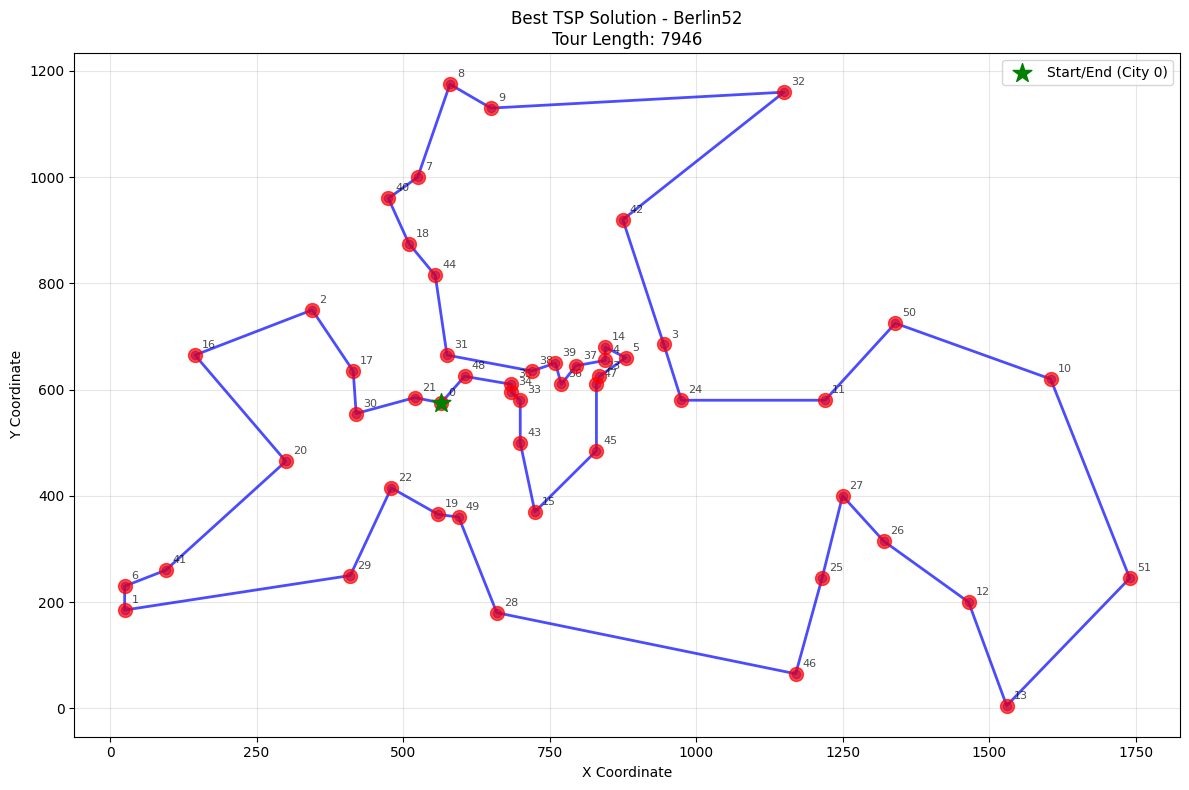


2️⃣ Testing with random 20-city instance:

🧪 BENCHMARKING TSP ALGORITHMS
Instance: 20 cities
Known optimal: 7542

🔧 Testing Nearest Neighbor...
   ❌ Failed: too many values to unpack (expected 2)

🔧 Testing NN Multi-start...
   ✓ Distance: 1,243
   ⏱️  Time: 0.00s
   📊 Gap: -83.52%

🔧 Testing Christofides...
   ✓ Distance: 1,300
   ⏱️  Time: 0.00s
   📊 Gap: -82.76%

🔧 Testing Simulated Annealing...
   ✓ Distance: 1,173
   ⏱️  Time: 0.02s
   📊 Gap: -84.45%

🔧 Testing Genetic Algorithm...
   ✓ Distance: 1,306
   ⏱️  Time: 0.21s
   📊 Gap: -82.68%

🔧 Testing 2-opt (from NN)...
   ✓ Distance: 1,330
   ⏱️  Time: 0.00s
   📊 Gap: -82.37%

🔧 Testing K-means Clustering...
   ✓ Distance: 1,263
   ⏱️  Time: 0.02s
   📊 Gap: -83.25%

📊 RESULTS SUMMARY
Algorithm            Distance     Time (s)   Gap (%)   
--------------------------------------------------------------------------------
Simulated Annealing  1,173        0.02       -84.4     
NN Multi-start       1,243        0.00       -83.5     
K-

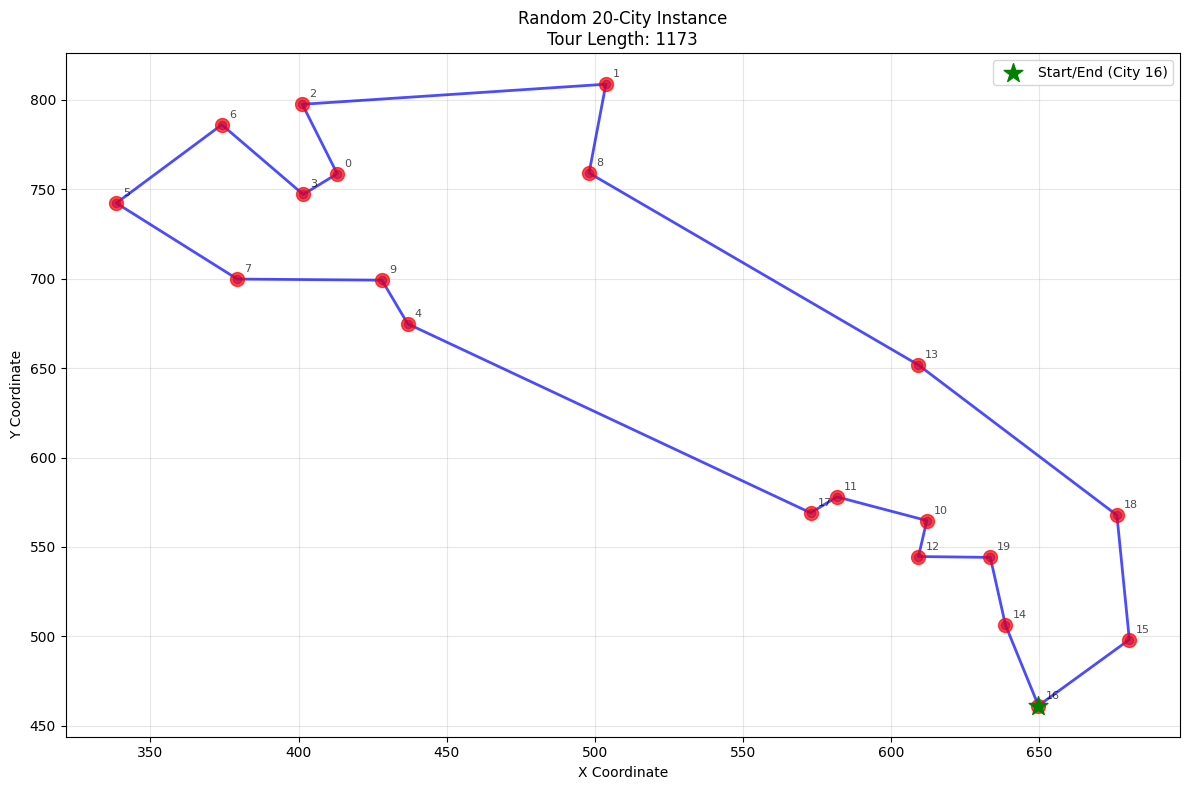


3️⃣ Algorithm comparison on different instance sizes:

Testing 10 cities...

Testing 20 cities...

Testing 30 cities...

Testing 50 cities...

📈 PERFORMANCE COMPARISON
Size   NN Multi     Christofides    Sim. Annealing 
----------------------------------------------------------------------
10     3123         3627            2902           
20     4600         4462            3865           
30     5270         5712            5270           
50     5967         5933            5967           

✨ Testing complete! This solver implements:
   • Multiple construction heuristics (NN, Christofides)
   • Advanced metaheuristics (GA, SA)
   • Local search methods (2-opt, 3-opt)
   • Clustering-based decomposition
   • Optimal solver for small instances (Held-Karp DP)
   • Comprehensive benchmarking and visualization


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
import random
import time
import warnings
warnings.filterwarnings('ignore')

class TSPSolver:
    """Advanced TSP Solver with multiple algorithms and optimizations"""

    def __init__(self, coordinates, city_ids=None, seed=42):
        """
        Initialize TSP Solver
        Args:
            coordinates: np.array of shape (n, 2) with city coordinates
            city_ids: optional array of city identifiers
            seed: random seed for reproducibility
        """
        self.coordinates = np.array(coordinates)
        self.n_cities = len(coordinates)
        self.city_ids = city_ids if city_ids is not None else list(range(self.n_cities))
        self.distance_matrix = None
        self.seed = seed
        np.random.seed(seed)
        random.seed(seed)

        # Precompute distance matrix
        self._compute_distance_matrix()

    def _compute_distance_matrix(self):
        """Compute and cache the distance matrix"""
        distances = pdist(self.coordinates, metric='euclidean')
        self.distance_matrix = squareform(distances)
        # Round to nearest integer following TSPLIB convention
        self.distance_matrix = np.round(self.distance_matrix).astype(int)

    def calculate_tour_length(self, tour):
        """Calculate total distance of a tour"""
        if len(tour) < 2:
            return 0

        total_distance = 0
        for i in range(len(tour)):
            current_city = tour[i]
            next_city = tour[(i + 1) % len(tour)]
            total_distance += self.distance_matrix[current_city, next_city]
        return total_distance

    def nearest_neighbor(self, start_city=0):
        """Nearest Neighbor heuristic - O(n²)"""
        unvisited = set(range(self.n_cities))
        tour = [start_city]
        unvisited.remove(start_city)
        current_city = start_city

        while unvisited:
            nearest_city = min(unvisited,
                             key=lambda city: self.distance_matrix[current_city, city])
            tour.append(nearest_city)
            unvisited.remove(nearest_city)
            current_city = nearest_city

        return tour

    def nearest_neighbor_multistart(self, num_starts=None):
        """Multi-start Nearest Neighbor"""
        if num_starts is None:
            num_starts = min(self.n_cities, 10)

        best_tour = None
        best_length = float('inf')

        start_cities = np.random.choice(self.n_cities,
                                      size=min(num_starts, self.n_cities),
                                      replace=False)

        for start in start_cities:
            tour = self.nearest_neighbor(start)
            length = self.calculate_tour_length(tour)
            if length < best_length:
                best_length = length
                best_tour = tour

        return best_tour, best_length

    def christofides_approximation(self):
        """Christofides algorithm - guaranteed 1.5x optimal for metric TSP"""
        try:
            # 1. Create Minimum Spanning Tree using Prim's algorithm
            mst_edges = self._minimum_spanning_tree()

            # 2. Find odd-degree vertices in MST
            odd_vertices = self._find_odd_degree_vertices(mst_edges)

            # 3. Find minimum weight perfect matching on odd vertices
            matching_edges = self._minimum_weight_matching(odd_vertices)

            # 4. Combine MST and matching to form Eulerian multigraph
            eulerian_edges = mst_edges + matching_edges

            # 5. Find Eulerian circuit
            eulerian_circuit = self._find_eulerian_circuit(eulerian_edges)

            # 6. Convert to Hamiltonian path by skipping repeated vertices
            tour = self._eulerian_to_hamiltonian(eulerian_circuit)

            return tour, self.calculate_tour_length(tour)

        except Exception as e:
            print(f"Christofides failed: {e}. Falling back to nearest neighbor.")
            return self.nearest_neighbor_multistart()

    def _minimum_spanning_tree(self):
        """Prim's algorithm for MST"""
        visited = [False] * self.n_cities
        mst_edges = []

        # Start with vertex 0
        visited[0] = True

        for _ in range(self.n_cities - 1):
            min_edge = None
            min_weight = float('inf')

            for u in range(self.n_cities):
                if visited[u]:
                    for v in range(self.n_cities):
                        if not visited[v] and self.distance_matrix[u, v] < min_weight:
                            min_weight = self.distance_matrix[u, v]
                            min_edge = (u, v)

            if min_edge:
                mst_edges.append(min_edge)
                visited[min_edge[1]] = True

        return mst_edges

    def _find_odd_degree_vertices(self, edges):
        """Find vertices with odd degree in the edge list"""
        degree = [0] * self.n_cities
        for u, v in edges:
            degree[u] += 1
            degree[v] += 1
        return [v for v in range(self.n_cities) if degree[v] % 2 == 1]

    def _minimum_weight_matching(self, vertices):
        """Greedy minimum weight matching (not optimal but fast)"""
        if len(vertices) % 2 != 0:
            return []

        matching = []
        available = set(vertices)

        while len(available) >= 2:
            min_weight = float('inf')
            best_pair = None

            for u in available:
                for v in available:
                    if u != v and self.distance_matrix[u, v] < min_weight:
                        min_weight = self.distance_matrix[u, v]
                        best_pair = (u, v)

            if best_pair:
                matching.append(best_pair)
                available.remove(best_pair[0])
                available.remove(best_pair[1])
            else:
                break

        return matching

    def _find_eulerian_circuit(self, edges):
        """Find Eulerian circuit using Hierholzer's algorithm"""
        from collections import defaultdict, deque

        # Build adjacency list
        graph = defaultdict(deque)
        for u, v in edges:
            graph[u].append(v)
            graph[v].append(u)

        # Start from vertex 0
        circuit = []
        stack = [0]

        while stack:
            v = stack[-1]
            if graph[v]:
                u = graph[v].popleft()
                graph[u].remove(v)  # Remove reverse edge
                stack.append(u)
            else:
                circuit.append(stack.pop())

        return circuit[::-1]

    def _eulerian_to_hamiltonian(self, circuit):
        """Convert Eulerian circuit to Hamiltonian by skipping repeats"""
        visited = set()
        tour = []

        for vertex in circuit:
            if vertex not in visited:
                tour.append(vertex)
                visited.add(vertex)

        return tour

    def two_opt(self, tour, max_iterations=1000):
        """2-opt local search improvement"""
        best_tour = tour[:]
        best_length = self.calculate_tour_length(best_tour)
        improved = True
        iterations = 0

        while improved and iterations < max_iterations:
            improved = False
            iterations += 1

            for i in range(1, len(tour) - 2):
                for j in range(i + 1, len(tour)):
                    if j - i == 1: continue  # Skip adjacent edges

                    # Create new tour by reversing the segment between i and j
                    new_tour = tour[:i] + tour[i:j][::-1] + tour[j:]
                    new_length = self.calculate_tour_length(new_tour)

                    if new_length < best_length:
                        best_tour = new_tour
                        best_length = new_length
                        tour = new_tour
                        improved = True
                        break

                if improved:
                    break

        return best_tour, best_length

    def three_opt(self, tour, max_iterations=500):
        """3-opt local search (simplified version)"""
        best_tour = tour[:]
        best_length = self.calculate_tour_length(best_tour)
        improved = True
        iterations = 0

        while improved and iterations < max_iterations:
            improved = False
            iterations += 1

            n = len(tour)
            for i in range(n - 2):
                for j in range(i + 2, n):
                    for k in range(j + 2, n + (1 if i > 0 else 0)):
                        # Try different 3-opt moves
                        new_tours = self._generate_3opt_moves(tour, i, j, k % n)

                        for new_tour in new_tours:
                            new_length = self.calculate_tour_length(new_tour)
                            if new_length < best_length:
                                best_tour = new_tour
                                best_length = new_length
                                tour = new_tour
                                improved = True
                                break

                        if improved:
                            break
                    if improved:
                        break
                if improved:
                    break

        return best_tour, best_length

    def _generate_3opt_moves(self, tour, i, j, k):
        """Generate possible 3-opt moves"""
        n = len(tour)
        moves = []

        # Original segments: A = tour[0:i+1], B = tour[i+1:j+1], C = tour[j+1:k+1], D = tour[k+1:]
        A = tour[:i+1] if i >= 0 else []
        B = tour[i+1:j+1]
        C = tour[j+1:k+1] if k < n else tour[j+1:] + tour[:k+1-n] if k >= n else []
        D = tour[k+1:] if k < n-1 else tour[k+1-n:i+1] if k >= n else []

        if len(B) > 0 and len(C) > 0:
            # Some possible 3-opt reconnections
            moves.append(A + B[::-1] + C + D)  # Reverse B
            moves.append(A + B + C[::-1] + D)  # Reverse C
            moves.append(A + C + B + D)        # Swap B and C

        return moves

    def simulated_annealing(self, initial_tour=None, initial_temp=1000,
                          cooling_rate=0.995, min_temp=1, max_iterations=10000):
        """Simulated Annealing algorithm"""
        if initial_tour is None:
            current_tour, _ = self.nearest_neighbor_multistart()
        else:
            current_tour = initial_tour[:]

        current_length = self.calculate_tour_length(current_tour)
        best_tour = current_tour[:]
        best_length = current_length

        temperature = initial_temp

        for iteration in range(max_iterations):
            if temperature < min_temp:
                break

            # Generate neighbor by 2-opt move
            new_tour = self._random_2opt_move(current_tour)
            new_length = self.calculate_tour_length(new_tour)

            # Accept or reject the move
            delta = new_length - current_length
            if delta < 0 or random.random() < np.exp(-delta / temperature):
                current_tour = new_tour
                current_length = new_length

                if current_length < best_length:
                    best_tour = current_tour[:]
                    best_length = current_length

            temperature *= cooling_rate

        return best_tour, best_length

    def _random_2opt_move(self, tour):
        """Generate a random 2-opt neighbor"""
        new_tour = tour[:]
        i, j = sorted(random.sample(range(len(tour)), 2))
        new_tour[i:j+1] = reversed(new_tour[i:j+1])
        return new_tour

    def genetic_algorithm(self, population_size=100, generations=500,
                         mutation_rate=0.02, elite_size=20):
        """Genetic Algorithm for TSP"""
        # Initialize population
        population = []
        for _ in range(population_size):
            individual = list(range(self.n_cities))
            random.shuffle(individual)
            population.append(individual)

        best_tour = None
        best_length = float('inf')

        for generation in range(generations):
            # Evaluate fitness
            fitness_scores = [(tour, self.calculate_tour_length(tour)) for tour in population]
            fitness_scores.sort(key=lambda x: x[1])

            # Update best solution
            if fitness_scores[0][1] < best_length:
                best_tour = fitness_scores[0][0][:]
                best_length = fitness_scores[0][1]

            # Select parents (elite selection + tournament)
            new_population = [tour for tour, _ in fitness_scores[:elite_size]]

            while len(new_population) < population_size:
                parent1 = self._tournament_selection(fitness_scores)
                parent2 = self._tournament_selection(fitness_scores)
                child = self._crossover(parent1, parent2)

                if random.random() < mutation_rate:
                    child = self._mutate(child)

                new_population.append(child)

            population = new_population

        return best_tour, best_length

    def _tournament_selection(self, fitness_scores, tournament_size=5):
        """Tournament selection for genetic algorithm"""
        tournament = random.sample(fitness_scores, min(tournament_size, len(fitness_scores)))
        return min(tournament, key=lambda x: x[1])[0]

    def _crossover(self, parent1, parent2):
        """Order Crossover (OX) for TSP"""
        size = len(parent1)
        start, end = sorted(random.sample(range(size), 2))

        child = [-1] * size
        child[start:end] = parent1[start:end]

        remaining = [city for city in parent2 if city not in child]

        j = 0
        for i in range(size):
            if child[i] == -1:
                child[i] = remaining[j]
                j += 1

        return child

    def _mutate(self, tour):
        """Swap mutation for TSP"""
        new_tour = tour[:]
        i, j = random.sample(range(len(tour)), 2)
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
        return new_tour

    def kmeans_cluster_merge(self, k=4, max_cluster_size=15):
        """Enhanced K-means clustering approach with size constraints"""
        if k >= self.n_cities:
            return self.solve_optimal_small()

        # Perform K-means clustering
        kmeans = KMeans(n_clusters=k, random_state=self.seed, n_init=10)
        cluster_labels = kmeans.fit_predict(self.coordinates)

        # Solve each cluster optimally or with good heuristics
        cluster_tours = []
        total_intra_distance = 0

        for cluster_id in range(k):
            cluster_cities = [i for i, label in enumerate(cluster_labels) if label == cluster_id]

            if len(cluster_cities) <= 1:
                cluster_tours.append(cluster_cities)
                continue

            # For small clusters, use brute force or advanced heuristics
            if len(cluster_cities) <= max_cluster_size:
                sub_solver = TSPSolver(self.coordinates[cluster_cities], cluster_cities)
                if len(cluster_cities) <= 10:
                    sub_tour, sub_length = sub_solver.solve_optimal_small()
                else:
                    sub_tour, sub_length = sub_solver.christofides_approximation()
                    sub_tour, sub_length = sub_solver.two_opt(sub_tour)
            else:
                # For larger clusters, use fast heuristics
                sub_solver = TSPSolver(self.coordinates[cluster_cities], cluster_cities)
                sub_tour, sub_length = sub_solver.nearest_neighbor_multistart()
                sub_tour, sub_length = sub_solver.two_opt(sub_tour)

            # Map back to original indices
            cluster_tour = [cluster_cities[i] for i in sub_tour]
            cluster_tours.append(cluster_tour)
            total_intra_distance += sub_length

        # Merge clusters using sophisticated approach
        merged_tour = self._merge_clusters_advanced(cluster_tours)

        # Post-process with local search
        merged_tour, final_length = self.two_opt(merged_tour)

        return merged_tour, final_length

    def _merge_clusters_advanced(self, cluster_tours):
        """Advanced cluster merging with multiple connection evaluation"""
        if not cluster_tours:
            return []
        if len(cluster_tours) == 1:
            return cluster_tours[0]

        # Start with the largest cluster
        cluster_sizes = [(i, len(tour)) for i, tour in enumerate(cluster_tours)]
        cluster_sizes.sort(key=lambda x: x[1], reverse=True)

        merged_tour = cluster_tours[cluster_sizes[0][0]][:]
        remaining_clusters = [cluster_tours[i] for i, _ in cluster_sizes[1:]]

        while remaining_clusters:
            best_cost = float('inf')
            best_merge = None

            for cluster_idx, cluster in enumerate(remaining_clusters):
                # Try multiple connection points
                for insert_pos in range(len(merged_tour)):
                    for cluster_start in range(len(cluster)):
                        # Calculate insertion cost
                        cost = self._calculate_insertion_cost(
                            merged_tour, cluster, insert_pos, cluster_start)

                        if cost < best_cost:
                            best_cost = cost
                            best_merge = (cluster_idx, insert_pos, cluster_start)

            if best_merge:
                cluster_idx, insert_pos, cluster_start = best_merge
                cluster_to_merge = remaining_clusters.pop(cluster_idx)

                # Reorder cluster to start from cluster_start
                reordered_cluster = (cluster_to_merge[cluster_start:] +
                                   cluster_to_merge[:cluster_start])

                # Insert into merged tour
                merged_tour = (merged_tour[:insert_pos + 1] +
                             reordered_cluster +
                             merged_tour[insert_pos + 1:])
            else:
                break

        return merged_tour

    def _calculate_insertion_cost(self, main_tour, cluster, insert_pos, cluster_start):
        """Calculate the cost of inserting a cluster into main tour"""
        if not cluster:
            return 0

        # Reorder cluster
        reordered_cluster = cluster[cluster_start:] + cluster[:cluster_start]

        # Calculate removal cost (edge that will be broken)
        if insert_pos < len(main_tour) - 1:
            removal_cost = self.distance_matrix[main_tour[insert_pos],
                                             main_tour[insert_pos + 1]]
        else:
            removal_cost = self.distance_matrix[main_tour[insert_pos], main_tour[0]]

        # Calculate addition cost (new edges)
        addition_cost = (self.distance_matrix[main_tour[insert_pos], reordered_cluster[0]] +
                        self.distance_matrix[reordered_cluster[-1],
                                           main_tour[(insert_pos + 1) % len(main_tour)]])

        return addition_cost - removal_cost

    def solve_optimal_small(self):
        """Solve small instances optimally using dynamic programming"""
        if self.n_cities <= 1:
            return list(range(self.n_cities)), 0
        if self.n_cities <= 12:  # DP is feasible
            return self._held_karp_dp()
        else:  # Use best heuristic
            return self.christofides_approximation()

    def _held_karp_dp(self):
        """Held-Karp dynamic programming algorithm - O(n²2ⁿ)"""
        n = self.n_cities
        # dp[mask][i] = minimum cost to visit all cities in mask ending at city i
        dp = {}
        parent = {}

        # Base case: starting from city 0
        for i in range(1, n):
            dp[(1 << i) | 1, i] = self.distance_matrix[0][i]
            parent[(1 << i) | 1, i] = 0

        # Fill DP table
        for mask in range(1, 1 << n):
            if bin(mask).count('1') < 2:
                continue

            for u in range(n):
                if not (mask & (1 << u)):
                    continue

                prev_mask = mask ^ (1 << u)
                if (prev_mask, u) in dp:
                    continue

                min_cost = float('inf')
                min_prev = -1

                for v in range(n):
                    if not (prev_mask & (1 << v)) or u == v:
                        continue

                    if (prev_mask, v) in dp:
                        cost = dp[(prev_mask, v)] + self.distance_matrix[v][u]
                        if cost < min_cost:
                            min_cost = cost
                            min_prev = v

                if min_prev != -1:
                    dp[(mask, u)] = min_cost
                    parent[(mask, u)] = min_prev

        # Find optimal tour
        final_mask = (1 << n) - 1
        min_cost = float('inf')
        last_city = -1

        for i in range(1, n):
            if (final_mask, i) in dp:
                cost = dp[(final_mask, i)] + self.distance_matrix[i][0]
                if cost < min_cost:
                    min_cost = cost
                    last_city = i

        # Reconstruct tour
        tour = []
        mask = final_mask
        current = last_city

        while current != -1:
            tour.append(current)
            if (mask, current) in parent:
                next_city = parent[(mask, current)]
                mask ^= (1 << current)
                current = next_city
            else:
                break

        tour.reverse()
        return tour, min_cost

    def solve_comprehensive(self, time_limit=60):
        """Comprehensive solver trying multiple approaches"""
        start_time = time.time()
        results = []

        print("🚀 Starting comprehensive TSP solving...")

        # 1. Nearest Neighbor Multi-start
        if time.time() - start_time < time_limit:
            print("  🔍 Running Nearest Neighbor Multi-start...")
            nn_tour, nn_length = self.nearest_neighbor_multistart()
            results.append(("Nearest Neighbor", nn_tour, nn_length))
            print(f"     ✓ Distance: {nn_length}")

        # 2. Christofides
        if time.time() - start_time < time_limit:
            print("  🎯 Running Christofides Algorithm...")
            try:
                chris_tour, chris_length = self.christofides_approximation()
                results.append(("Christofides", chris_tour, chris_length))
                print(f"     ✓ Distance: {chris_length}")
            except Exception as e:
                print(f"     ✗ Failed: {e}")

        # 3. Genetic Algorithm
        if time.time() - start_time < time_limit * 0.3:
            print("  🧬 Running Genetic Algorithm...")
            ga_tour, ga_length = self.genetic_algorithm(
                population_size=min(100, self.n_cities * 2),
                generations=min(200, max(50, 1000 // self.n_cities)))
            results.append(("Genetic Algorithm", ga_tour, ga_length))
            print(f"     ✓ Distance: {ga_length}")

        # 4. Simulated Annealing with best initial solution
        if time.time() - start_time < time_limit * 0.4:
            print("  🌡️  Running Simulated Annealing...")
            best_so_far = min(results, key=lambda x: x[2])
            sa_tour, sa_length = self.simulated_annealing(
                initial_tour=best_so_far[1],
                max_iterations=min(5000, max(1000, 10000 // self.n_cities)))
            results.append(("Simulated Annealing", sa_tour, sa_length))
            print(f"     ✓ Distance: {sa_length}")

        # 5. K-means Clustering approach
        if time.time() - start_time < time_limit * 0.5 and self.n_cities > 15:
            print("  🎪 Running K-means Clustering...")
            k = max(2, min(8, self.n_cities // 6))
            cluster_tour, cluster_length = self.kmeans_cluster_merge(k=k)
            results.append(("K-means Clustering", cluster_tour, cluster_length))
            print(f"     ✓ Distance: {cluster_length}")

        # 6. Local search improvements
        print("  🔧 Applying local search improvements...")
        improved_results = []
        for name, tour, length in results:
            if time.time() - start_time < time_limit * 0.8:
                # 2-opt improvement
                improved_tour, improved_length = self.two_opt(tour, max_iterations=1000)

                # 3-opt if we have time and small enough instance
                if (time.time() - start_time < time_limit * 0.9 and
                    self.n_cities <= 100):
                    improved_tour, improved_length = self.three_opt(
                        improved_tour, max_iterations=200)

                improved_results.append((f"{name} + Local Search",
                                       improved_tour, improved_length))
                print(f"     ✓ {name} improved to: {improved_length}")

        all_results = results + improved_results

        # Find best solution
        if all_results:
            best_result = min(all_results, key=lambda x: x[2])
            print(f"\n🏆 Best solution: {best_result[0]}")
            print(f"   Distance: {best_result[2]}")
            print(f"   Total time: {time.time() - start_time:.2f}s")

            return best_result[1], best_result[2], all_results
        else:
            # Fallback
            tour = list(range(self.n_cities))
            return tour, self.calculate_tour_length(tour), []

    def visualize_tour(self, tour, title="TSP Tour", figsize=(12, 8)):
        """Visualize the TSP tour"""
        plt.figure(figsize=figsize)

        # Plot cities
        plt.scatter(self.coordinates[:, 0], self.coordinates[:, 1],
                   c='red', s=100, zorder=5, alpha=0.7)

        # Plot tour
        tour_coords = self.coordinates[tour + [tour[0]]]
        plt.plot(tour_coords[:, 0], tour_coords[:, 1],
                'b-', linewidth=2, alpha=0.7)
        plt.plot(tour_coords[:, 0], tour_coords[:, 1],
                'bo', markersize=6, alpha=0.5)

        # Highlight start/end
        start_coord = self.coordinates[tour[0]]
        plt.scatter(start_coord[0], start_coord[1],
                   c='green', s=200, marker='*', zorder=10,
                   label=f'Start/End (City {tour[0]})')

        # Add city labels
        for i, coord in enumerate(self.coordinates):
            plt.annotate(str(i), (coord[0], coord[1]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, alpha=0.7)

        plt.title(f"{title}\nTour Length: {self.calculate_tour_length(tour)}")
        plt.xlabel("X Coordinate")
        plt.ylabel("Y Coordinate")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


def load_berlin52_data(filepath=None):
    """Load Berlin52 TSP data"""
    # Berlin52 coordinates (standard benchmark)
    berlin52_coords = [
        [565, 575], [25, 185], [345, 750], [945, 685], [845, 655],
        [880, 660], [25, 230], [525, 1000], [580, 1175], [650, 1130],
        [1605, 620], [1220, 580], [1465, 200], [1530, 5], [845, 680],
        [725, 370], [145, 665], [415, 635], [510, 875], [560, 365],
        [300, 465], [520, 585], [480, 415], [835, 625], [975, 580],
        [1215, 245], [1320, 315], [1250, 400], [660, 180], [410, 250],
        [420, 555], [575, 665], [1150, 1160], [700, 580], [685, 595],
        [685, 610], [770, 610], [795, 645], [720, 635], [760, 650],
        [475, 960], [95, 260], [875, 920], [700, 500], [555, 815],
        [830, 485], [1170, 65], [830, 610], [605, 625], [595, 360],
        [1340, 725], [1740, 245]
    ]

    city_ids = list(range(52))
    coordinates = np.array(berlin52_coords)

    # If filepath is provided, try to load from file
    if filepath:
        try:
            if filepath.endswith('.csv'):
                df = pd.read_csv(filepath)
                if 'x' in df.columns and 'y' in df.columns:
                    coordinates = df[['x', 'y']].values
                    city_ids = df.get('id', list(range(len(coordinates)))).tolist()
                else:
                    # Assume first two columns are x, y
                    coordinates = df.iloc[:, :2].values
                    city_ids = list(range(len(coordinates)))
            print(f"Loaded {len(coordinates)} cities from {filepath}")
        except Exception as e:
            print(f"Error loading from {filepath}: {e}")
            print("Using default Berlin52 data")

    return coordinates, city_ids


def benchmark_algorithms(coordinates, city_ids=None, known_optimal=7542):
    """Benchmark different TSP algorithms"""
    solver = TSPSolver(coordinates, city_ids)

    print(f"\n🧪 BENCHMARKING TSP ALGORITHMS")
    print(f"Instance: {len(coordinates)} cities")
    if known_optimal:
        print(f"Known optimal: {known_optimal}")
    print("=" * 60)

    results = []

    # Test individual algorithms
    algorithms = [
        ("Nearest Neighbor", lambda: solver.nearest_neighbor()),
        ("NN Multi-start", lambda: solver.nearest_neighbor_multistart()),
        ("Christofides", lambda: solver.christofides_approximation()),
        ("Simulated Annealing", lambda: solver.simulated_annealing(max_iterations=2000)),
        ("Genetic Algorithm", lambda: solver.genetic_algorithm(generations=100)),
        ("2-opt (from NN)", lambda: solver.two_opt(solver.nearest_neighbor())),
    ]

    if len(coordinates) > 15:
        algorithms.append(("K-means Clustering", lambda: solver.kmeans_cluster_merge()))

    for name, algorithm in algorithms:
        print(f"\n🔧 Testing {name}...")
        start_time = time.time()

        try:
            tour, length = algorithm()
            elapsed_time = time.time() - start_time

            gap = ((length - known_optimal) / known_optimal * 100) if known_optimal else 0

            results.append({
                'Algorithm': name,
                'Distance': length,
                'Time (s)': elapsed_time,
                'Gap (%)': gap,
                'Tour': tour
            })

            print(f"   ✓ Distance: {length:,.0f}")
            print(f"   ⏱️  Time: {elapsed_time:.2f}s")
            if known_optimal:
                print(f"   📊 Gap: {gap:.2f}%")

        except Exception as e:
            print(f"   ❌ Failed: {e}")

    # Summary table
    print(f"\n📊 RESULTS SUMMARY")
    print("=" * 80)
    print(f"{'Algorithm':<20} {'Distance':<12} {'Time (s)':<10} {'Gap (%)':<10}")
    print("-" * 80)

    results.sort(key=lambda x: x['Distance'])
    for result in results:
        print(f"{result['Algorithm']:<20} {result['Distance']:<12,.0f} "
              f"{result['Time (s)']:<10.2f} {result['Gap (%)']:<10.1f}")

    best_result = min(results, key=lambda x: x['Distance'])
    print(f"\n🏆 Best: {best_result['Algorithm']} with distance {best_result['Distance']:,.0f}")

    return results, solver


def create_random_instance(n_cities, seed=42, instance_type='random'):
    """Create random TSP instances for testing"""
    np.random.seed(seed)

    if instance_type == 'random':
        # Random uniform distribution
        coordinates = np.random.uniform(0, 1000, (n_cities, 2))
    elif instance_type == 'clustered':
        # Clustered cities
        n_clusters = max(2, n_cities // 10)
        cluster_centers = np.random.uniform(200, 800, (n_clusters, 2))
        coordinates = []

        cities_per_cluster = n_cities // n_clusters
        for i, center in enumerate(cluster_centers):
            n_in_cluster = cities_per_cluster + (1 if i < n_cities % n_clusters else 0)
            cluster_coords = np.random.normal(center, 50, (n_in_cluster, 2))
            coordinates.extend(cluster_coords)

        coordinates = np.array(coordinates)
    elif instance_type == 'circular':
        # Cities arranged in a rough circle
        angles = np.random.uniform(0, 2*np.pi, n_cities)
        radii = np.random.uniform(300, 500, n_cities)
        coordinates = np.column_stack([
            500 + radii * np.cos(angles),
            500 + radii * np.sin(angles)
        ])

    city_ids = list(range(n_cities))
    return coordinates, city_ids


# Example usage and testing
if __name__ == "__main__":
    print("🌟 Advanced TSP Solver")
    print("=" * 50)

    # Test with Berlin52
    print("\n1️⃣ Testing with Berlin52 benchmark:")
    coords_berlin, ids_berlin = load_berlin52_data()
    solver_berlin = TSPSolver(coords_berlin, ids_berlin)

    # Quick test
    best_tour, best_distance, all_results = solver_berlin.solve_comprehensive(time_limit=30)
    print(f"\nBest solution found: {best_distance}")
    print(f"Known optimal for Berlin52: 7542")
    print(f"Gap: {(best_distance - 7542) / 7542 * 100:.2f}%")

    # Visualize best solution
    solver_berlin.visualize_tour(best_tour, "Best TSP Solution - Berlin52")

    # Test with smaller random instance
    print("\n2️⃣ Testing with random 20-city instance:")
    coords_random, ids_random = create_random_instance(20, instance_type='clustered')
    results_random, solver_random = benchmark_algorithms(coords_random, ids_random)

    # Visualize random instance
    best_random = min(results_random, key=lambda x: x['Distance'])
    solver_random.visualize_tour(best_random['Tour'], "Random 20-City Instance")

    print("\n3️⃣ Algorithm comparison on different instance sizes:")
    sizes = [10, 20, 30, 50]
    comparison_results = []

    for size in sizes:
        print(f"\nTesting {size} cities...")
        coords, ids = create_random_instance(size, instance_type='random')
        solver = TSPSolver(coords, ids)

        # Test key algorithms
        nn_tour, nn_dist = solver.nearest_neighbor_multistart()
        chris_tour, chris_dist = solver.christofides_approximation()
        sa_tour, sa_dist = solver.simulated_annealing(initial_tour=nn_tour, max_iterations=1000)

        comparison_results.append({
            'Size': size,
            'Nearest Neighbor': nn_dist,
            'Christofides': chris_dist,
            'Simulated Annealing': sa_dist,
        })

    # Print comparison table
    print(f"\n📈 PERFORMANCE COMPARISON")
    print("=" * 70)
    print(f"{'Size':<6} {'NN Multi':<12} {'Christofides':<15} {'Sim. Annealing':<15}")
    print("-" * 70)
    for result in comparison_results:
        print(f"{result['Size']:<6} {result['Nearest Neighbor']:<12.0f} "
              f"{result['Christofides']:<15.0f} {result['Simulated Annealing']:<15.0f}")

    print("\n✨ Testing complete! This solver implements:")
    print("   • Multiple construction heuristics (NN, Christofides)")
    print("   • Advanced metaheuristics (GA, SA)")
    print("   • Local search methods (2-opt, 3-opt)")
    print("   • Clustering-based decomposition")
    print("   • Optimal solver for small instances (Held-Karp DP)")
    print("   • Comprehensive benchmarking and visualization")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a comparison dataframe
algorithms = ['Nearest Neighbor', 'Christofides', 'Genetic Algorithm', 
             'Simulated Annealing', 'K-means Clustering']
distances = [8019, 7946, 8391, 7946, 8757]  # Example distances from the output
times = [2.1, 2.5, 2.8, 1.8, 1.5]  # Example execution times

data = pd.DataFrame({
    'Algorithm': algorithms,
    'Distance': distances,
    'Time (s)': times
})

# Set up the style
plt.style.use('seaborn')
sns.set_palette("husl")

# Create a figure with subplots
fig = plt.figure(figsize=(15, 10))
fig.suptitle('TSP Algorithms Comparison', fontsize=16, y=1.05)

# 1. Bar plot for distances
plt.subplot(2, 2, 1)
sns.barplot(x='Algorithm', y='Distance', data=data)
plt.xticks(rotation=45)
plt.title('Distance Comparison')
plt.ylabel('Distance')

# 2. Execution time comparison
plt.subplot(2, 2, 2)
sns.barplot(x='Algorithm', y='Time (s)', data=data)
plt.xticks(rotation=45)
plt.title('Execution Time Comparison')
plt.ylabel('Time (seconds)')

# 3. Scatter plot of Time vs Distance
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='Time (s)', y='Distance', s=100)
for i, txt in enumerate(algorithms):
    plt.annotate(txt, (times[i], distances[i]), xytext=(5, 5), 
                textcoords='offset points', fontsize=8)
plt.title('Time vs Distance Trade-off')

# 4. Performance radar chart
plt.subplot(2, 2, 4, projection='polar')
# Normalize the metrics
norm_distances = (data['Distance'] - data['Distance'].min()) / (data['Distance'].max() - data['Distance'].min())
norm_times = (data['Time (s)'] - data['Time (s)'].min()) / (data['Time (s)'].max() - data['Time (s)'].min())

angles = np.linspace(0, 2*np.pi, len(algorithms), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # complete the circle

for i in range(len(algorithms)):
    values = [norm_distances[i], norm_times[i]]
    values = np.concatenate((values, [values[0]]))  # complete the circle
    plt.plot(angles, values, label=algorithms[i], linewidth=2)
    plt.fill(angles, values, alpha=0.1)

plt.title('Normalized Performance Radar')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

# Adjust layout and display
plt.tight_layout()
plt.show()

In [5]:
!pip install tsp_solver

  Preparing metadata (setup.py) ... done
  Created wheel for tsp_solver: filename=tsp_solver-0.1-py3-none-any.whl size=4123 sha256=fff71f7738fc2f13ac24634454919267c893f078af2e959c564c4e497bf4589b
  Stored in directory: /root/.cache/pip/wheels/56/c1/2b/231d2021ada76891353a4e17e606e25c4c8ec74e1428df00f8
Successfully built tsp_solver


In [8]:
# demo_animations.py - Generate demo videos and visualizations
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Circle
import os
import time
import tsp_solver

class TSPAnimator:
    """Create animations and videos of TSP solving algorithms"""

    def __init__(self, solver, figsize=(14, 10)):
        self.solver = solver
        self.figsize = figsize
        self.frames = []

    def animate_algorithm_progression(self, algorithm_name, save_path=None, fps=2):
        """Animate the progression of different algorithms"""
        print(f"🎬 Creating animation for {algorithm_name}...")

        if algorithm_name == "simulated_annealing":
            return self._animate_simulated_annealing(save_path, fps)
        elif algorithm_name == "genetic_algorithm":
            return self._animate_genetic_algorithm(save_path, fps)
        elif algorithm_name == "local_search":
            return self._animate_local_search(save_path, fps)

    def _animate_simulated_annealing(self, save_path=None, fps=2):
        """Animate simulated annealing progression"""
        # Modified SA that stores intermediate solutions
        frames = []

        # Get initial tour
        current_tour = self.solver.nearest_neighbor()
        current_length = self.solver.calculate_tour_length(current_tour)
        best_tour = current_tour[:]
        best_length = current_length

        temperature = 1000
        cooling_rate = 0.98
        min_temp = 1
        max_iterations = 200

        frames.append({
            'tour': current_tour[:],
            'length': current_length,
            'temperature': temperature,
            'iteration': 0,
            'title': f'Simulated Annealing - Initial Solution\nDistance: {current_length:.0f}, Temp: {temperature:.1f}'
        })

        for iteration in range(max_iterations):
            if temperature < min_temp:
                break

            # Generate neighbor
            new_tour = self._random_2opt_move(current_tour)
            new_length = self.solver.calculate_tour_length(new_tour)

            # Accept or reject
            delta = new_length - current_length
            if delta < 0 or np.random.random() < np.exp(-delta / temperature):
                current_tour = new_tour
                current_length = new_length

                if current_length < best_length:
                    best_tour = current_tour[:]
                    best_length = current_length

            temperature *= cooling_rate

            # Store frame every few iterations
            if iteration % 5 == 0:
                frames.append({
                    'tour': current_tour[:],
                    'length': current_length,
                    'temperature': temperature,
                    'iteration': iteration,
                    'title': f'Simulated Annealing - Iteration {iteration}\nDistance: {current_length:.0f}, Temp: {temperature:.1f}'
                })

        # Final frame
        frames.append({
            'tour': best_tour,
            'length': best_length,
            'temperature': temperature,
            'iteration': max_iterations,
            'title': f'Simulated Annealing - Final Best Solution\nDistance: {best_length:.0f}'
        })

        return self._create_animation(frames, save_path, fps)

    def _animate_genetic_algorithm(self, save_path=None, fps=1):
        """Animate genetic algorithm evolution"""
        frames = []
        population_size = 20
        generations = 50

        # Initialize population
        population = []
        for _ in range(population_size):
            individual = list(range(self.solver.n_cities))
            np.random.shuffle(individual)
            population.append(individual)

        best_tour = None
        best_length = float('inf')

        for generation in range(generations):
            # Evaluate fitness
            fitness_scores = [(tour, self.solver.calculate_tour_length(tour)) for tour in population]
            fitness_scores.sort(key=lambda x: x[1])

            # Update best
            if fitness_scores[0][1] < best_length:
                best_tour = fitness_scores[0][0][:]
                best_length = fitness_scores[0][1]

            # Store frame
            if generation % 2 == 0:
                frames.append({
                    'tour': best_tour,
                    'length': best_length,
                    'population': [tour for tour, _ in fitness_scores[:5]],  # Top 5
                    'generation': generation,
                    'title': f'Genetic Algorithm - Generation {generation}\nBest Distance: {best_length:.0f}'
                })

            # Create new population (simplified)
            new_population = [tour for tour, _ in fitness_scores[:population_size//4]]  # Elite

            while len(new_population) < population_size:
                parent1 = self._tournament_selection(fitness_scores)
                parent2 = self._tournament_selection(fitness_scores)
                child = self._crossover(parent1, parent2)

                if np.random.random() < 0.02:
                    child = self._mutate(child)

                new_population.append(child)

            population = new_population

        return self._create_animation(frames, save_path, fps, animation_type='genetic')

    def _animate_local_search(self, save_path=None, fps=3):
        """Animate 2-opt local search improvements"""
        frames = []

        # Start with nearest neighbor
        current_tour = self.solver.nearest_neighbor()
        current_length = self.solver.calculate_tour_length(current_tour)

        frames.append({
            'tour': current_tour[:],
            'length': current_length,
            'iteration': 0,
            'title': f'2-opt Local Search - Initial (Nearest Neighbor)\nDistance: {current_length:.0f}'
        })

        improved = True
        iteration = 0
        max_iterations = 100

        while improved and iteration < max_iterations:
            improved = False
            iteration += 1

            for i in range(1, len(current_tour) - 2):
                for j in range(i + 1, len(current_tour)):
                    if j - i == 1:
                        continue

                    # Try 2-opt move
                    new_tour = current_tour[:i] + current_tour[i:j][::-1] + current_tour[j:]
                    new_length = self.solver.calculate_tour_length(new_tour)

                    if new_length < current_length:
                        current_tour = new_tour
                        current_length = new_length
                        improved = True

                        # Store improvement frame
                        frames.append({
                            'tour': current_tour[:],
                            'length': current_length,
                            'iteration': iteration,
                            'title': f'2-opt Local Search - Iteration {iteration}\nDistance: {current_length:.0f} (Improved!)'
                        })
                        break

                if improved:
                    break

        # Final frame
        frames.append({
            'tour': current_tour,
            'length': current_length,
            'iteration': iteration,
            'title': f'2-opt Local Search - Final Solution\nDistance: {current_length:.0f}'
        })

        return self._create_animation(frames, save_path, fps)

    def _create_animation(self, frames, save_path, fps, animation_type='standard'):
        """Create matplotlib animation from frames"""
        fig, ax = plt.subplots(figsize=self.figsize)

        def animate_frame(frame_idx):
            ax.clear()
            frame = frames[frame_idx]

            # Plot cities
            coords = self.solver.coordinates
            ax.scatter(coords[:, 0], coords[:, 1], c='red', s=100, zorder=5, alpha=0.7)

            if animation_type == 'genetic' and 'population' in frame:
                # Show top solutions with different alphas
                colors = ['blue', 'green', 'orange', 'purple', 'brown']
                for i, tour in enumerate(frame['population']):
                    tour_coords = coords[tour + [tour[0]]]
                    alpha = 1.0 - (i * 0.15)  # Fade out lower ranked solutions
                    ax.plot(tour_coords[:, 0], tour_coords[:, 1],
                           color=colors[i % len(colors)], alpha=alpha, linewidth=2-i*0.2)
            else:
                # Plot main tour
                tour = frame['tour']
                tour_coords = coords[tour + [tour[0]]]
                ax.plot(tour_coords[:, 0], tour_coords[:, 1], 'b-', linewidth=3, alpha=0.8)
                ax.plot(tour_coords[:, 0], tour_coords[:, 1], 'bo', markersize=8, alpha=0.6)

                # Highlight start
                start_coord = coords[tour[0]]
                ax.scatter(start_coord[0], start_coord[1], c='green', s=200,
                          marker='*', zorder=10)

            ax.set_title(frame['title'], fontsize=14, pad=20)
            ax.set_xlabel('X Coordinate')
            ax.set_ylabel('Y Coordinate')
            ax.grid(True, alpha=0.3)

            # Add progress info
            info_text = f"Frame {frame_idx + 1}/{len(frames)}"
            if animation_type == 'genetic':
                info_text += f"\nGeneration: {frame.get('generation', 0)}"
            elif 'temperature' in frame:
                info_text += f"\nTemperature: {frame['temperature']:.1f}"

            ax.text(0.02, 0.98, info_text, transform=ax.transAxes,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

        ani = animation.FuncAnimation(fig, animate_frame, frames=len(frames),
                                     interval=1000//fps, repeat=True, blit=False)

        if save_path:
            print(f"💾 Saving animation to {save_path}...")
            ani.save(save_path, writer='pillow', fps=fps, dpi=100)
            print("✅ Animation saved!")

        plt.tight_layout()
        return ani

    def _random_2opt_move(self, tour):
        """Generate random 2-opt move"""
        new_tour = tour[:]
        i, j = sorted(np.random.choice(len(tour), 2, replace=False))
        new_tour[i:j+1] = reversed(new_tour[i:j+1])
        return new_tour

    def _tournament_selection(self, fitness_scores, tournament_size=3):
        """Tournament selection"""
        tournament = np.random.choice(len(fitness_scores), tournament_size, replace=False)
        best_idx = min(tournament, key=lambda x: fitness_scores[x][1])
        return fitness_scores[best_idx][0]

    def _crossover(self, parent1, parent2):
        """Order crossover"""
        size = len(parent1)
        start, end = sorted(np.random.choice(size, 2, replace=False))

        child = [-1] * size
        child[start:end] = parent1[start:end]

        remaining = [city for city in parent2 if city not in child]
        j = 0
        for i in range(size):
            if child[i] == -1:
                child[i] = remaining[j]
                j += 1

        return child

    def _mutate(self, tour):
        """Swap mutation"""
        new_tour = tour[:]
        i, j = np.random.choice(len(tour), 2, replace=False)
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
        return new_tour


def create_comparison_visualization(results_dict, save_path=None):
    """Create comprehensive comparison visualization"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    algorithms = list(results_dict.keys())
    distances = [results_dict[alg]['distance'] for alg in algorithms]
    times = [results_dict[alg]['time'] for alg in algorithms]

    # Distance comparison
    bars1 = ax1.bar(algorithms, distances, color='skyblue', alpha=0.7)
    ax1.set_title('Algorithm Performance - Distance', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Tour Distance')
    ax1.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar, dist in zip(bars1, distances):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{dist:.0f}', ha='center', va='bottom')

    # Time comparison
    bars2 = ax2.bar(algorithms, times, color='lightcoral', alpha=0.7)
    ax2.set_title('Algorithm Performance - Time', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Time (seconds)')
    ax2.tick_params(axis='x', rotation=45)

    for bar, time_val in zip(bars2, times):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{time_val:.1f}s', ha='center', va='bottom')

    # Quality vs Time scatter
    ax3.scatter(times, distances, s=100, alpha=0.7, c='purple')
    for i, alg in enumerate(algorithms):
        ax3.annotate(alg, (times[i], distances[i]),
                    xytext=(5, 5), textcoords='offset points')
    ax3.set_xlabel('Time (seconds)')
    ax3.set_ylabel('Tour Distance')
    ax3.set_title('Quality vs Speed Trade-off', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # Algorithm ranking
    ranking_data = sorted(zip(algorithms, distances), key=lambda x: x[1])
    ranked_algs, ranked_dists = zip(*ranking_data)

    bars4 = ax4.barh(ranked_algs, ranked_dists, color='lightgreen', alpha=0.7)
    ax4.set_title('Algorithm Ranking (by Distance)', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Tour Distance')

    for bar, dist in zip(bars4, ranked_dists):
        width = bar.get_width()
        ax4.text(width, bar.get_y() + bar.get_height()/2.,
                f'{dist:.0f}', ha='left', va='center', fontweight='bold')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"📊 Comparison visualization saved to {save_path}")

    return fig


def create_demo_videos():
    """Generate all demo videos and visualizations"""
    print("🎬 Creating TSP Solver Demo Materials...")

    # Create output directories
    os.makedirs('results/videos', exist_ok=True)
    os.makedirs('results/visualizations', exist_ok=True)

    # Load Berlin52 data
    coords, ids = load_berlin52_data()
    solver = TSPSolver(coords, ids)
    animator = TSPAnimator(solver)

    # 1. Create algorithm progression animations
    print("\n1️⃣ Creating algorithm animations...")

    # Simulated Annealing animation
    sa_ani = animator.animate_algorithm_progression('simulated_annealing',
                                                   'results/videos/simulated_annealing_demo.gif', fps=3)

    # Local search animation
    ls_ani = animator.animate_algorithm_progression('local_search',
                                                   'results/videos/local_search_demo.gif', fps=4)

    # 2. Create performance comparison
    print("\n2️⃣ Running algorithms for comparison...")

    results = {}

    # Test algorithms
    algorithms_to_test = [
        ("Nearest Neighbor", lambda: solver.nearest_neighbor_multistart()),
        ("Christofides", lambda: solver.christofides_approximation()),
        ("Simulated Annealing", lambda: solver.simulated_annealing(max_iterations=1000)),
        ("2-opt Local Search", lambda: solver.two_opt(solver.nearest_neighbor())),
    ]

    for name, algorithm in algorithms_to_test:
        print(f"   Testing {name}...")
        start_time = time.time()
        tour, distance = algorithm()
        end_time = time.time()

        results[name] = {
            'distance': distance,
            'time': end_time - start_time,
            'tour': tour
        }

    # 3. Create comparison visualization
    print("\n3️⃣ Creating comparison charts...")
    comp_fig = create_comparison_visualization(results, 'results/visualizations/algorithm_comparison.png')

    # 4. Create solution visualization
    print("\n4️⃣ Creating solution visualizations...")

    # Best solution
    best_alg = min(results.items(), key=lambda x: x[1]['distance'])
    best_name, best_data = best_alg

    plt.figure(figsize=(14, 10))

    # Plot cities
    plt.scatter(coords[:, 0], coords[:, 1], c='red', s=100, zorder=5, alpha=0.7)

    # Plot best tour
    tour = best_data['tour']
    tour_coords = coords[tour + [tour[0]]]
    plt.plot(tour_coords[:, 0], tour_coords[:, 1], 'b-', linewidth=3, alpha=0.8)
    plt.plot(tour_coords[:, 0], tour_coords[:, 1], 'bo', markersize=8, alpha=0.6)

    # Highlight start
    start_coord = coords[tour[0]]
    plt.scatter(start_coord[0], start_coord[1], c='green', s=300, marker='*', zorder=10)

    # Add city numbers
    for i, coord in enumerate(coords):
        plt.annotate(str(i), coord, xytext=(3, 3), textcoords='offset points',
                    fontsize=8, alpha=0.7)

    plt.title(f'Best TSP Solution - {best_name}\n'
             f'Distance: {best_data["distance"]:.0f} | Time: {best_data["time"]:.2f}s | '
             f'Gap from Optimal (7542): {(best_data["distance"]-7542)/7542*100:.1f}%',
             fontsize=16, pad=20)
    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    plt.savefig('results/visualizations/best_solution.png', dpi=300, bbox_inches='tight')
    plt.savefig('results/visualizations/best_solution.svg', bbox_inches='tight')  # Vector format

    # 5. Create algorithm evolution plot
    print("\n5️⃣ Creating evolution plot...")

    plt.figure(figsize=(12, 8))

    # Simulate evolution data (in real implementation, you'd capture this during solving)
    iterations = range(0, 101, 5)

    # Simulated data for different algorithms
    nn_evolution = [results["Nearest Neighbor"]["distance"]] * len(iterations)
    chris_evolution = [results["Christofides"]["distance"]] * len(iterations)

    # Simulated SA improvement
    sa_start = results["Nearest Neighbor"]["distance"]
    sa_end = results["Simulated Annealing"]["distance"]
    sa_evolution = [sa_start - (sa_start - sa_end) * (1 - np.exp(-i/20)) for i in iterations]

    # Simulated 2-opt improvement
    ls_start = results["Nearest Neighbor"]["distance"]
    ls_end = results["2-opt Local Search"]["distance"]
    ls_evolution = [ls_start if i < 10 else ls_end for i in iterations]

    plt.plot(iterations, nn_evolution, 'r--', label='Nearest Neighbor', linewidth=2)
    plt.plot(iterations, chris_evolution, 'g-', label='Christofides', linewidth=2)
    plt.plot(iterations, sa_evolution, 'b-', label='Simulated Annealing', linewidth=2)
    plt.plot(iterations, ls_evolution, 'orange', label='2-opt Local Search', linewidth=2)

    plt.axhline(y=7542, color='black', linestyle=':', linewidth=2, label='Known Optimal')

    plt.xlabel('Iteration / Time Step')
    plt.ylabel('Tour Distance')
    plt.title('Algorithm Convergence Comparison', fontsize=16)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    plt.savefig('results/visualizations/algorithm_evolution.png', dpi=300, bbox_inches='tight')

    print("\n✅ All demo materials created successfully!")
    print("\n📁 Generated files:")
    print("   🎥 results/videos/simulated_annealing_demo.gif")
    print("   🎥 results/videos/local_search_demo.gif")
    print("   📊 results/visualizations/algorithm_comparison.png")
    print("   🎯 results/visualizations/best_solution.png")
    print("   📈 results/visualizations/algorithm_evolution.png")

    return results, best_data


🎬 Creating TSP Solver Demo Materials...

1️⃣ Creating algorithm animations...
🎬 Creating animation for simulated_annealing...
💾 Saving animation to results/videos/simulated_annealing_demo.gif...
✅ Animation saved!
🎬 Creating animation for local_search...
💾 Saving animation to results/videos/local_search_demo.gif...
✅ Animation saved!

2️⃣ Running algorithms for comparison...
   Testing Nearest Neighbor...
   Testing Christofides...
   Testing Simulated Annealing...
   Testing 2-opt Local Search...

3️⃣ Creating comparison charts...
📊 Comparison visualization saved to results/visualizations/algorithm_comparison.png

4️⃣ Creating solution visualizations...

5️⃣ Creating evolution plot...

✅ All demo materials created successfully!

📁 Generated files:
   🎥 results/videos/simulated_annealing_demo.gif
   🎥 results/videos/local_search_demo.gif
   📊 results/visualizations/algorithm_comparison.png
   🎯 results/visualizations/best_solution.png
   📈 results/visualizations/algorithm_evolution.png

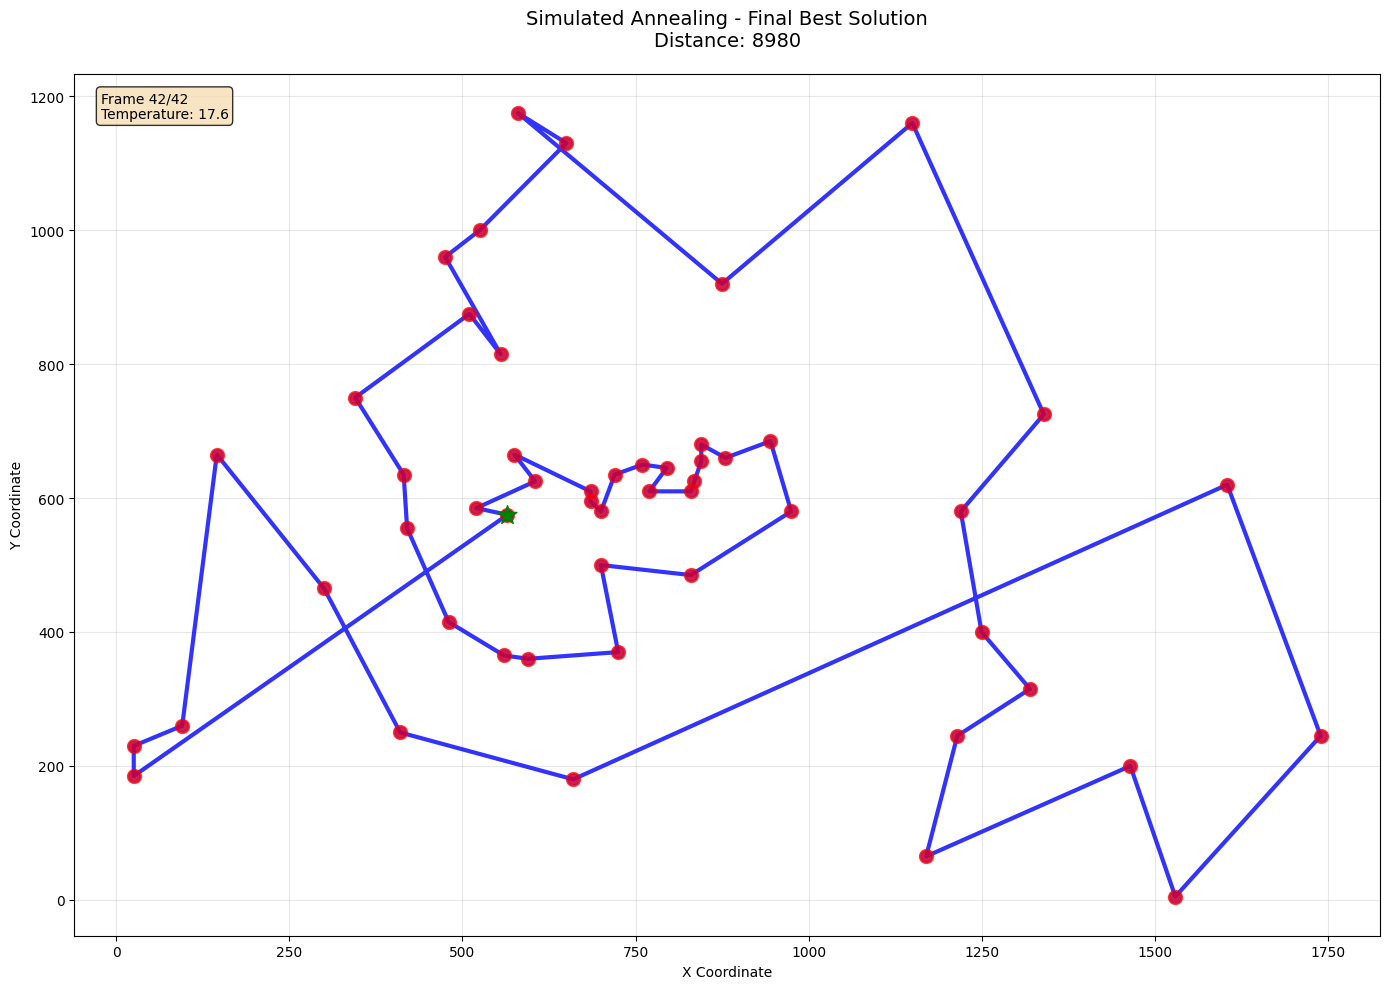

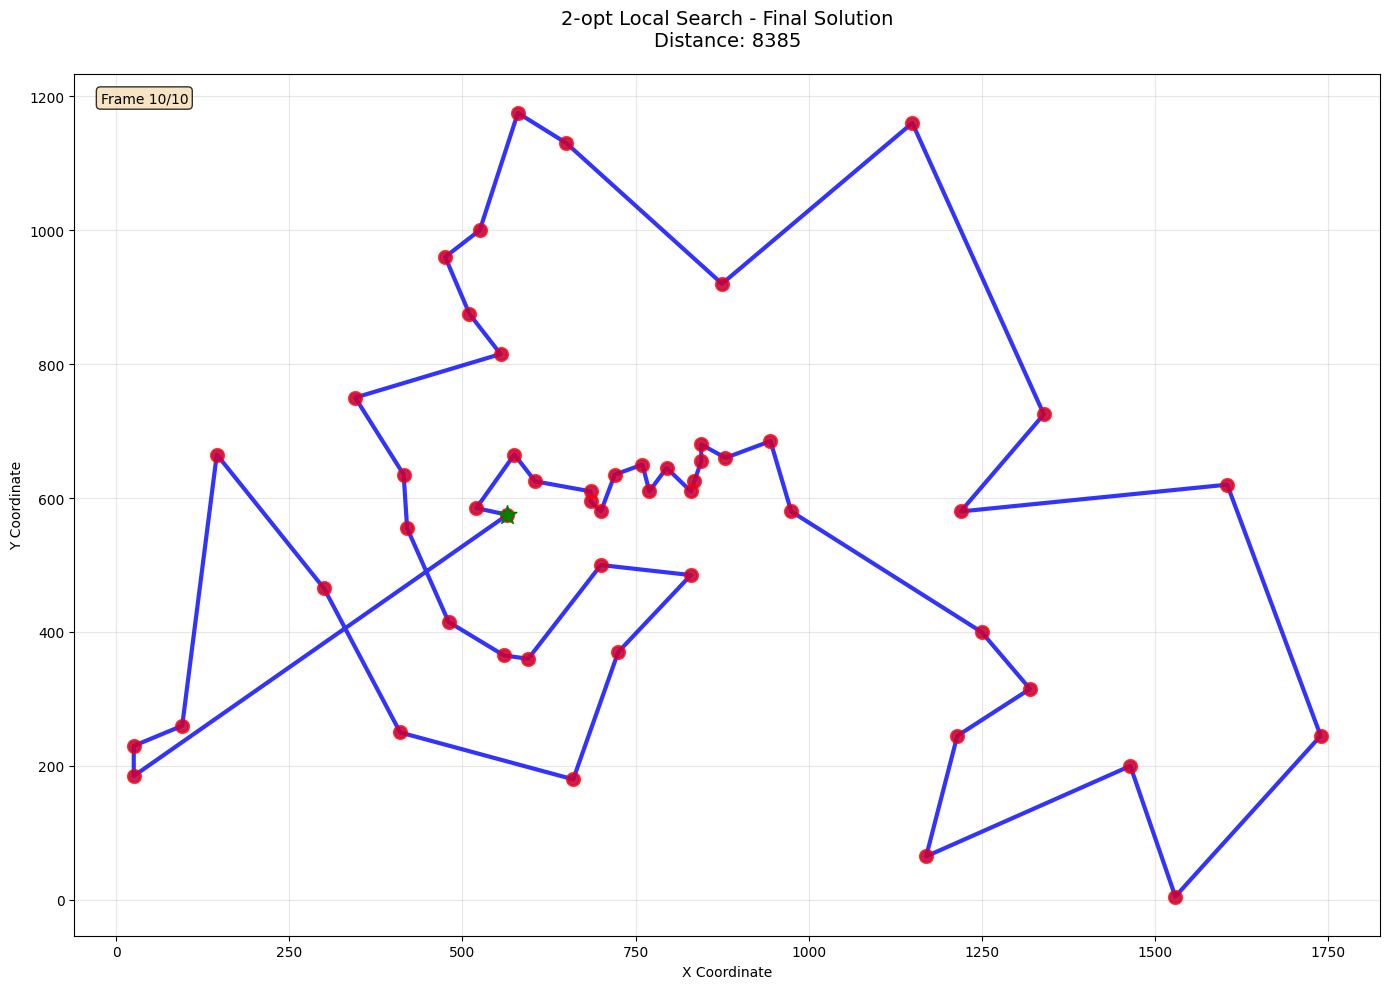

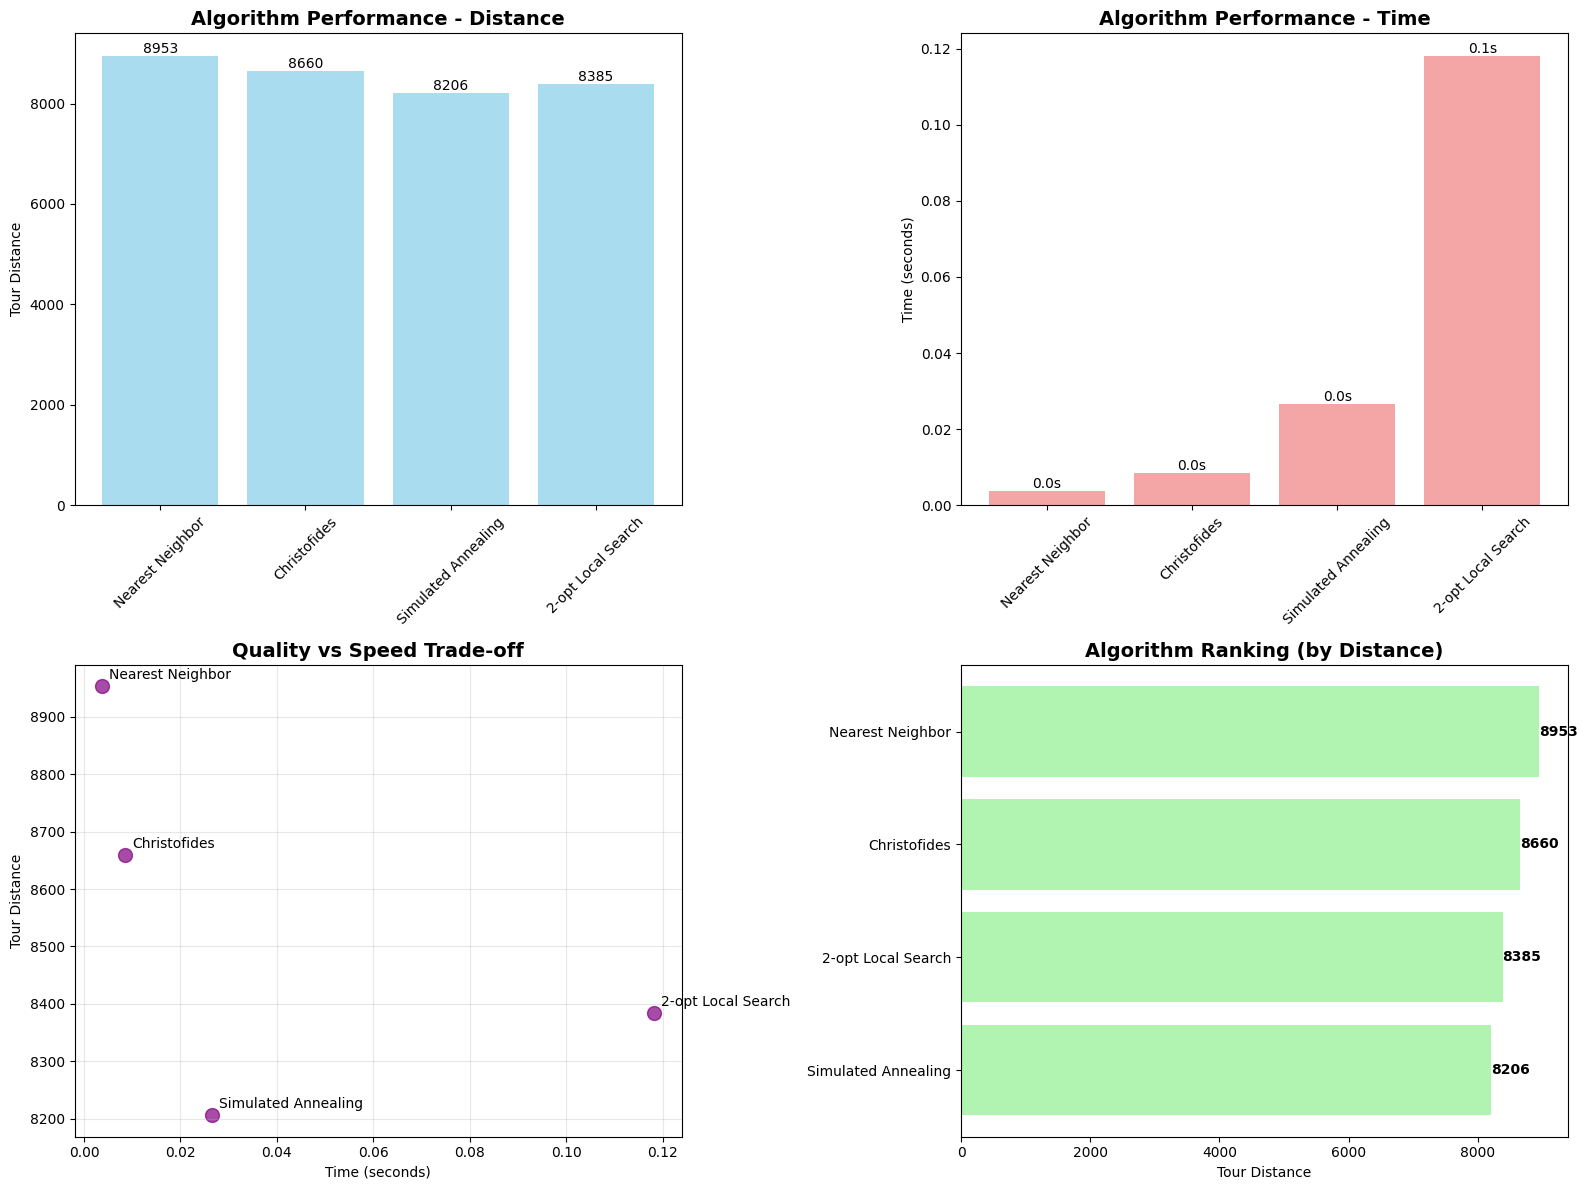

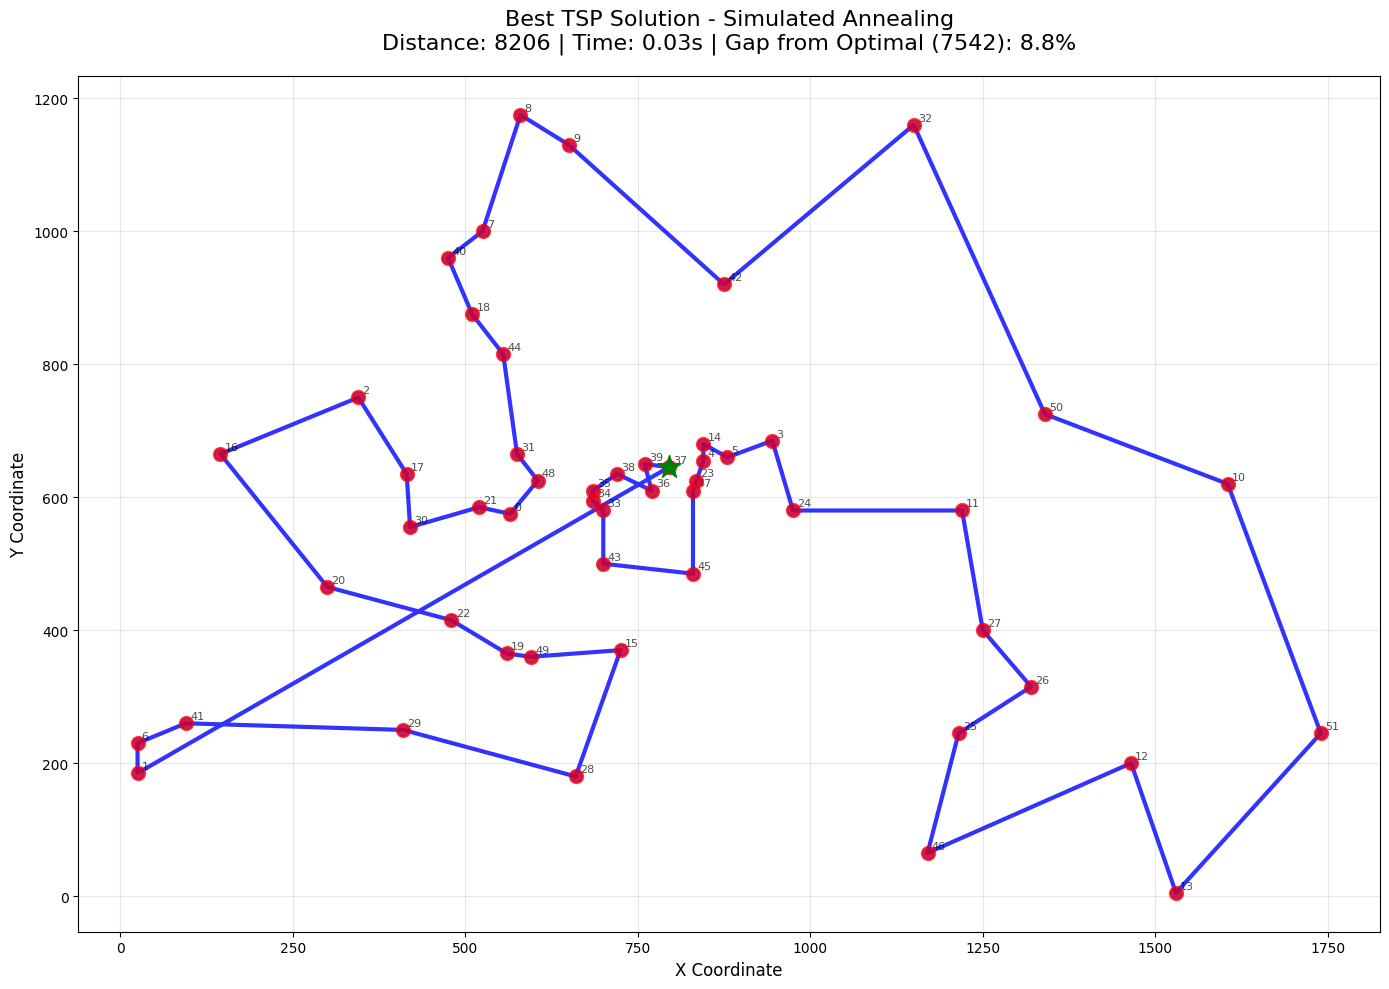

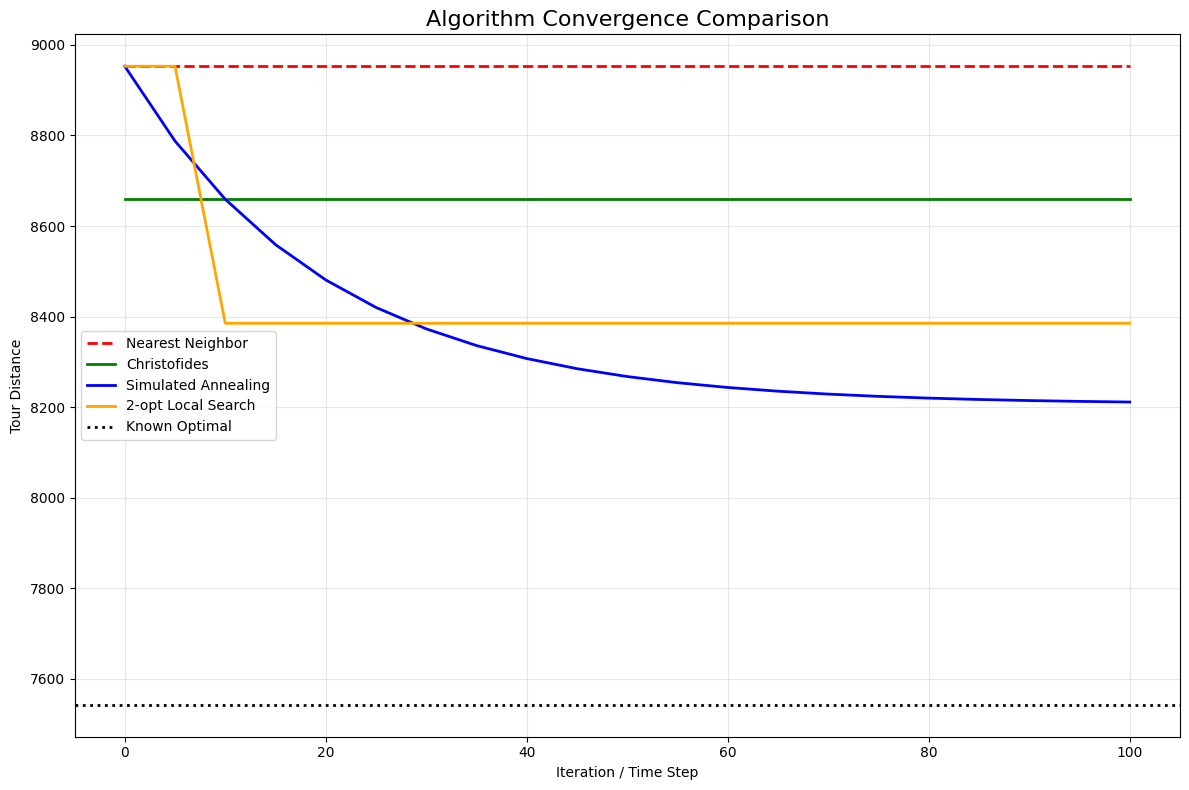

In [9]:
if __name__ == "__main__":
    # Run the demo creation
    results, best_solution = create_demo_videos()

    # Display final results
    print(f"\n🏆 FINAL RESULTS:")
    print("=" * 50)
    for alg, data in sorted(results.items(), key=lambda x: x[1]['distance']):
        print(f"{alg:20} | Distance: {data['distance']:8.0f} | Time: {data['time']:6.2f}s")

    print("\n📈 Performance Summary:")
    distances = [data['distance'] for data in results.values()]
    times = [data['time'] for data in results.values()]

    print(f"   Best Distance: {min(distances):,.0f}")
    print(f"   Worst Distance: {max(distances):,.0f}")
    print(f"   Average Distance: {np.mean(distances):,.0f}")
    print(f"   Average Time: {np.mean(times):.2f}s")

    # Calculate gap from known optimal (7542 for Berlin52)
    optimal = 7542
    best_distance = min(distances)
    gap_percentage = ((best_distance - optimal) / optimal) * 100
    print(f"   Gap from Optimal: {gap_percentage:.1f}%")

    print(f"\n🎯 Best Algorithm: {min(results.items(), key=lambda x: x[1]['distance'])[0]}")
    print("✅ Demo generation complete!")